In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
from sklearn.model_selection import train_test_split
import category_encoders as ce
import torch
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from torch.utils.data import  DataLoader,TensorDataset
from torch.optim.lr_scheduler import StepLR
import os
import seaborn as sns

In [3]:
df = pd.read_csv("house_prices_without_distances_processed.csv",index_col=0)
categorical_columns = ['Neighborhood',"District","Usage","Heat_type","Floor"]

C:\Users\PC\AppData\Local\Temp\ipykernel_19096\1148395603.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


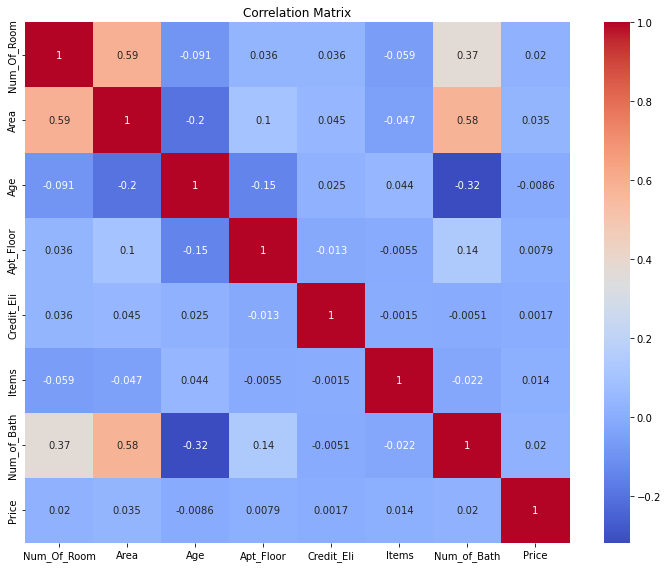

In [4]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation Matrix')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
Y = df["Price"].values


X = df.drop(columns=["Price"])

In [6]:
df

,District,Neighborhood,Num_Of_Room,Area,Floor,Age,Heat_type,Apt_Floor,Credit_Eli,Items,Num_of_Bath,Usage,Price
0,Keçiören,Etlik,4,145.0,interstage,16.0,Kombi,4.0,1.0,0,2.0,Boş,2790000.0
1,Çankaya,Birlik,8,340.0,interstage,18.0,Kombi,4.0,1.0,0,3.0,Boş,4450000.0
2,Keçiören,Ovacık,5,215.0,interstage,0.0,Merkezi (Pay Ölçer),13.0,1.0,0,2.0,Boş,4350000.0
3,Keçiören,Etlik,4,110.0,interstage,25.0,Kombi,3.0,1.0,0,1.0,Mülk Sahibi,1249000.0
4,Çankaya,Keklik Pınarı,4,120.0,interstage,26.0,Kombi,10.0,1.0,0,1.0,Boş,2445000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18312,Çankaya,Emek,6,180.0,interstage,25.0,Kombi,4.0,1.0,1,1.0,Boş,4500000.0
18313,Çankaya,Maltepe,4,110.0,interstage,36.0,Yerden Isıtma,4.0,1.0,0,1.0,Kiracılı,3250000.0
18314,Polatlı,Zafer,7,340.0,interstage,11.0,Kombi,4.0,1.0,0,2.0,Mülk Sahibi,1395000.0
18315,Çankaya,Yıldızevler,4,155.0,interstage,23.0,Merkezi,4.0,1.0,0,2.0,Boş,4750000.0


array([[<AxesSubplot:title={'center':'Num_Of_Room'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Apt_Floor'}>,
        <AxesSubplot:title={'center':'Credit_Eli'}>,
        <AxesSubplot:title={'center':'Items'}>],
       [<AxesSubplot:title={'center':'Num_of_Bath'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

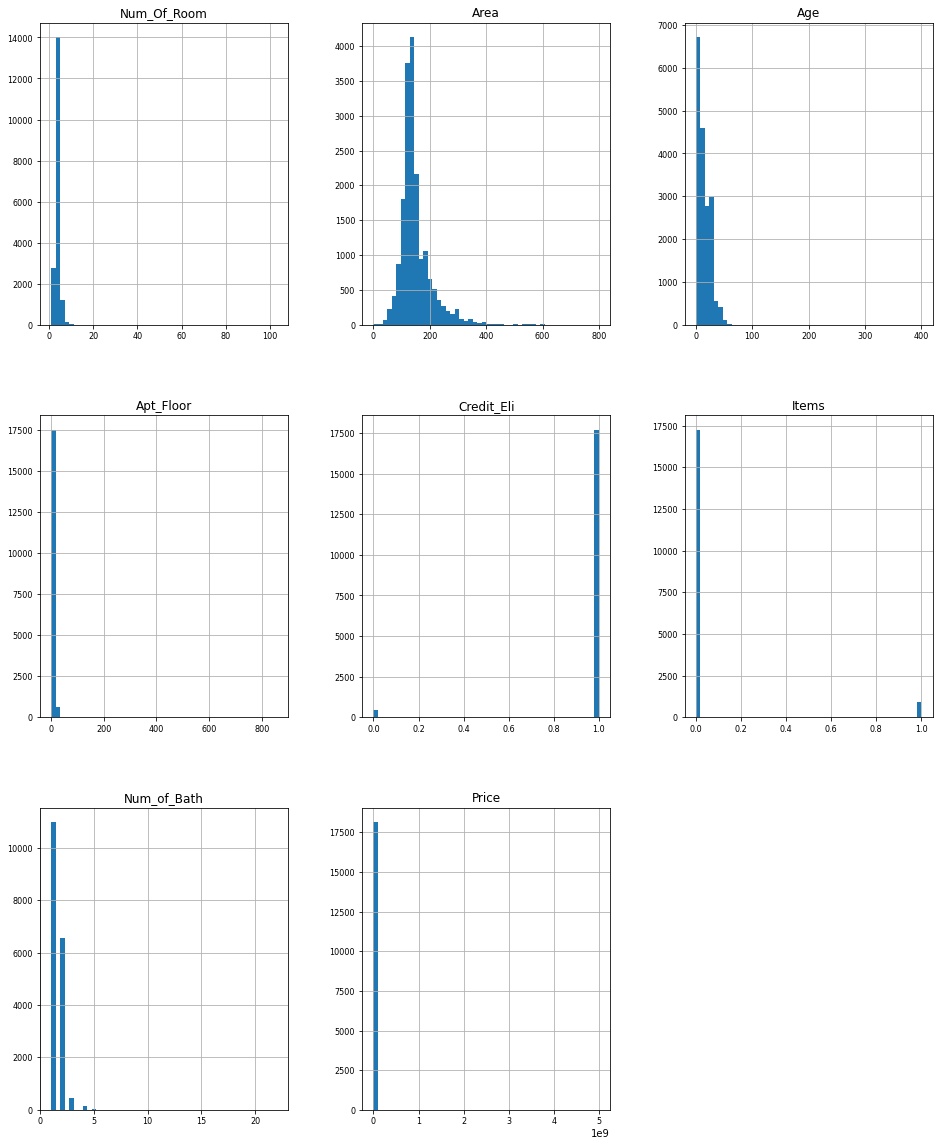

In [7]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [8]:

Q1 = np.percentile(Y, 25)
Q3 = np.percentile(Y, 75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (Y > lower_bound) & (Y < upper_bound)


df_filtered = df[mask]

In [9]:
df_filtered

,District,Neighborhood,Num_Of_Room,Area,Floor,Age,Heat_type,Apt_Floor,Credit_Eli,Items,Num_of_Bath,Usage,Price
0,Keçiören,Etlik,4,145.0,interstage,16.0,Kombi,4.0,1.0,0,2.0,Boş,2790000.0
1,Çankaya,Birlik,8,340.0,interstage,18.0,Kombi,4.0,1.0,0,3.0,Boş,4450000.0
2,Keçiören,Ovacık,5,215.0,interstage,0.0,Merkezi (Pay Ölçer),13.0,1.0,0,2.0,Boş,4350000.0
3,Keçiören,Etlik,4,110.0,interstage,25.0,Kombi,3.0,1.0,0,1.0,Mülk Sahibi,1249000.0
4,Çankaya,Keklik Pınarı,4,120.0,interstage,26.0,Kombi,10.0,1.0,0,1.0,Boş,2445000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18312,Çankaya,Emek,6,180.0,interstage,25.0,Kombi,4.0,1.0,1,1.0,Boş,4500000.0
18313,Çankaya,Maltepe,4,110.0,interstage,36.0,Yerden Isıtma,4.0,1.0,0,1.0,Kiracılı,3250000.0
18314,Polatlı,Zafer,7,340.0,interstage,11.0,Kombi,4.0,1.0,0,2.0,Mülk Sahibi,1395000.0
18315,Çankaya,Yıldızevler,4,155.0,interstage,23.0,Merkezi,4.0,1.0,0,2.0,Boş,4750000.0


array([[<AxesSubplot:title={'center':'Num_Of_Room'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Apt_Floor'}>,
        <AxesSubplot:title={'center':'Credit_Eli'}>,
        <AxesSubplot:title={'center':'Items'}>],
       [<AxesSubplot:title={'center':'Num_of_Bath'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

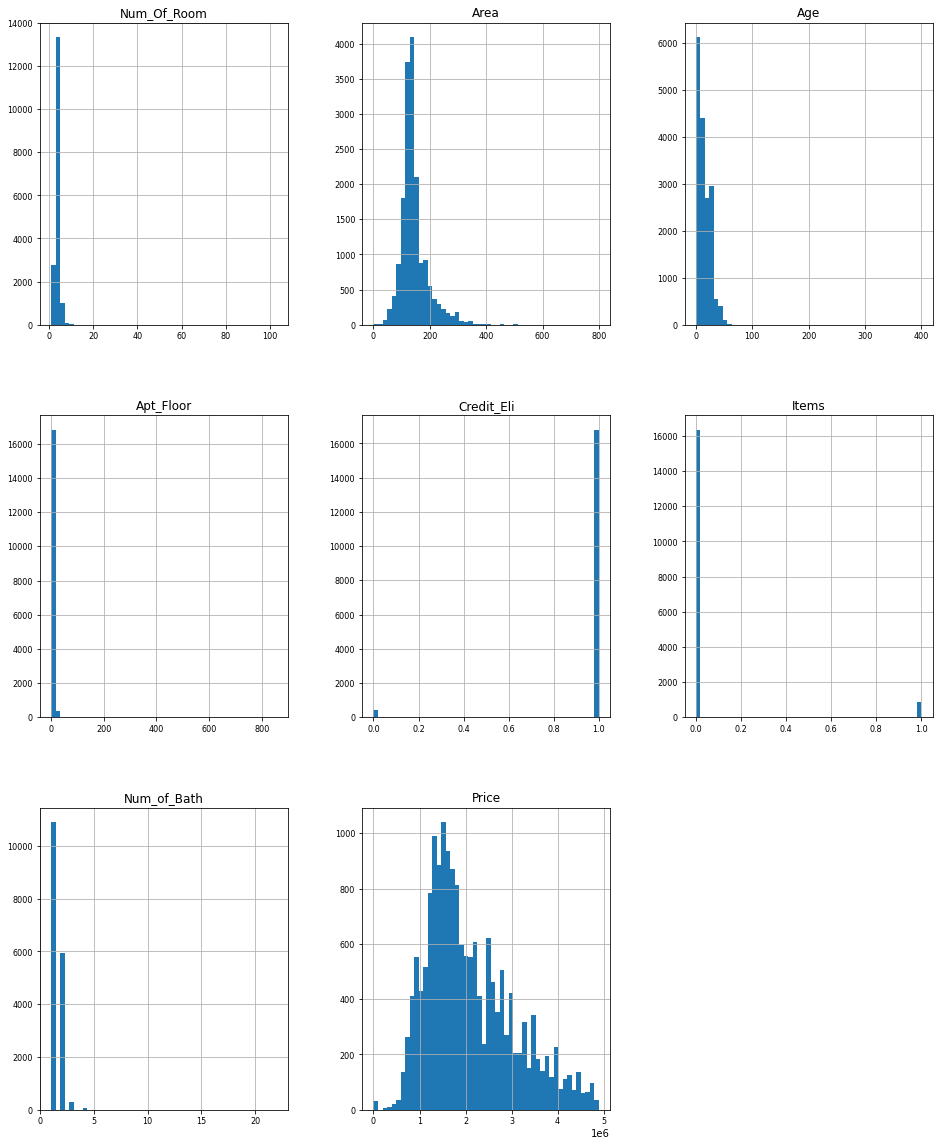

In [10]:
df_num = df_filtered.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [11]:
df_filtered.isna().sum()

District        0
Neighborhood    0
Num_Of_Room     0
Area            0
Floor           0
Age             0
Heat_type       0
Apt_Floor       0
Credit_Eli      0
Items           0
Num_of_Bath     0
Usage           0
Price           0
dtype: int64

In [13]:
Y = df_filtered["Price"]


X = df_filtered.drop(columns=["Price"])

In [14]:
X

,District,Neighborhood,Num_Of_Room,Area,Floor,Age,Heat_type,Apt_Floor,Credit_Eli,Items,Num_of_Bath,Usage
0,Keçiören,Etlik,4,145.0,interstage,16.0,Kombi,4.0,1.0,0,2.0,Boş
1,Çankaya,Birlik,8,340.0,interstage,18.0,Kombi,4.0,1.0,0,3.0,Boş
2,Keçiören,Ovacık,5,215.0,interstage,0.0,Merkezi (Pay Ölçer),13.0,1.0,0,2.0,Boş
3,Keçiören,Etlik,4,110.0,interstage,25.0,Kombi,3.0,1.0,0,1.0,Mülk Sahibi
4,Çankaya,Keklik Pınarı,4,120.0,interstage,26.0,Kombi,10.0,1.0,0,1.0,Boş
...,...,...,...,...,...,...,...,...,...,...,...,...
18312,Çankaya,Emek,6,180.0,interstage,25.0,Kombi,4.0,1.0,1,1.0,Boş
18313,Çankaya,Maltepe,4,110.0,interstage,36.0,Yerden Isıtma,4.0,1.0,0,1.0,Kiracılı
18314,Polatlı,Zafer,7,340.0,interstage,11.0,Kombi,4.0,1.0,0,2.0,Mülk Sahibi
18315,Çankaya,Yıldızevler,4,155.0,interstage,23.0,Merkezi,4.0,1.0,0,2.0,Boş


In [15]:
encoder = ce.TargetEncoder(cols=categorical_columns)
X_encoded = encoder.fit_transform(X, Y)

In [16]:
X_encoded

,District,Neighborhood,Num_Of_Room,Area,Floor,Age,Heat_type,Apt_Floor,Credit_Eli,Items,Num_of_Bath,Usage
0,2.021124e+06,2.031668e+06,4,145.0,2.091877e+06,16.0,1.919877e+06,4.0,1.0,0,2.0,2.190277e+06
1,2.602217e+06,2.807031e+06,8,340.0,2.091877e+06,18.0,1.919877e+06,4.0,1.0,0,3.0,2.190277e+06
2,2.021124e+06,3.682824e+06,5,215.0,2.091877e+06,0.0,3.031552e+06,13.0,1.0,0,2.0,2.190277e+06
3,2.021124e+06,2.031668e+06,4,110.0,2.091877e+06,25.0,1.919877e+06,3.0,1.0,0,1.0,2.048982e+06
4,2.602217e+06,2.539799e+06,4,120.0,2.091877e+06,26.0,1.919877e+06,10.0,1.0,0,1.0,2.190277e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
18312,2.602217e+06,3.013587e+06,6,180.0,2.091877e+06,25.0,1.919877e+06,4.0,1.0,1,1.0,2.190277e+06
18313,2.602217e+06,2.653127e+06,4,110.0,2.091877e+06,36.0,3.067916e+06,4.0,1.0,0,1.0,1.955511e+06
18314,1.191885e+06,1.127578e+06,7,340.0,2.091877e+06,11.0,1.919877e+06,4.0,1.0,0,2.0,2.048982e+06
18315,2.602217e+06,2.498462e+06,4,155.0,2.091877e+06,23.0,2.639422e+06,4.0,1.0,0,2.0,2.190277e+06


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded.values, Y.values, test_size=0.2, random_state=42)

In [18]:
scaler_X = MinMaxScaler(feature_range=(0,1))
scaler_Y = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(y_train.reshape(-1,1))
Y_test_scaled = scaler_Y.transform(y_test.reshape(-1,1))

In [19]:
Y_train_scaled

array([[0.70422529],
       [0.24494779],
       [0.19493758],
       ...,
       [0.35721563],
       [0.19902004],
       [0.33680329]])

In [20]:
X_train_tensor = torch.from_numpy(X_train_scaled).float()
y_train_tensor = torch.from_numpy(Y_train_scaled).float()
X_test_tensor = torch.from_numpy(X_test_scaled).float()
y_test_tensor = torch.from_numpy(Y_test_scaled).float()

In [21]:
X_train_tensor.shape

torch.Size([13763, 12])

In [22]:
y_train_tensor.shape

torch.Size([13763, 1])

In [23]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [24]:
train_dataset[0]

(tensor([0.3137, 0.4656, 0.0588, 0.3366, 0.0000, 0.0175, 0.7211, 0.0117, 1.0000,
         0.0000, 0.0500, 0.3981]),
 tensor([0.7042]))

In [25]:
class AdaptiveTanh(torch.nn.Module):
    def __init__(self, init_alpha = 0.5, init_beta=0.5):
        super(AdaptiveTanh, self).__init__()
        self.alpha = torch.nn.Parameter(torch.tensor(init_alpha))
        self.beta = torch.nn.Parameter(torch.tensor(init_beta))
    def forward(self, x):
        return torch.tanh(self.alpha*x * self.beta) 



class Net(nn.Module):
    def __init__(self,L1,L2,L3,L4):
        super(Net,self).__init__()
  
        self.layers = nn.Sequential(
      nn.Linear(12,L1),
      AdaptiveTanh(),
      nn.Linear(L1,L2),
      AdaptiveTanh(),
      nn.Linear(L2,L3),
      AdaptiveTanh(),
      nn.Linear(L3,L4),
      AdaptiveTanh(),
      nn.Linear(L4,1),
    )
    def forward(self, x):
        return self.layers(x)

In [26]:
def train(dataloader,model,loss_fn,optimizer):
    
    model.train()

    running_loss = 0

    for batch,(x,y) in enumerate(dataloader):

        
        
        optimizer.zero_grad()
        output = model(x) 
        loss   = loss_fn(output,y)
        loss.backward()
        optimizer.step()
        running_loss += loss
        
    
    avg_loss = running_loss/len(dataloader) 
    

    
    return avg_loss


In [27]:
def validate(dataloader,model,loss_fn):

    
    model.eval() 
    running_loss = 0
    
    with torch.no_grad(): 
        
        for (x,y) in dataloader:
           
            output        = model(x)
            loss          = (loss_fn(output,y))
            
            running_loss += loss

    avg_loss = running_loss/len(dataloader)
      
    
    return avg_loss


In [29]:
model = Net(16,16,8,8)
loss_fn   = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
nb_epochs = 500
batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size , shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size , shuffle=False)
scheduler = StepLR(optimizer, step_size=200, gamma=0.5)

In [30]:
train_losses = []
valid_losses = []


for epoch in range(nb_epochs):

    train_loss = train(train_dataloader,model,loss_fn,optimizer)

    train_losses.append(train_loss)

    valid_loss = validate(test_dataloader,model,loss_fn)

    valid_losses.append(valid_loss)

    scheduler.step()

    if epoch %100 == 0:
        print(f"Epoch : {epoch} train loss :{train_loss}  test loss : {valid_loss}  ")

Epoch : 0 train loss :0.038865070790052414  test loss : 0.036178749054670334  
Epoch : 100 train loss :0.012357800267636776  test loss : 0.013146661221981049  
Epoch : 200 train loss :0.011835716664791107  test loss : 0.0127186831086874  
Epoch : 300 train loss :0.011466694064438343  test loss : 0.01233831699937582  
Epoch : 400 train loss :0.010854046791791916  test loss : 0.01197627279907465  


R2 score: 0.6778


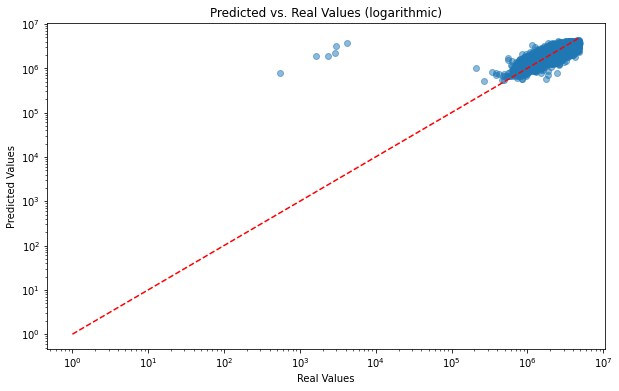

In [31]:
with torch.no_grad():
    
    y_pred_tensor = model(X_test_tensor)
    y_pred_scaled = y_pred_tensor.numpy().squeeze()


y_pred = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1, 1)).squeeze()
y_test_unscaled = scaler_Y.inverse_transform(Y_test_scaled).squeeze()
r2 = r2_score(y_test_unscaled, y_pred)
print(f"R2 score: {r2:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test_unscaled, y_pred, alpha=0.5)
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Real Values (logarithmic)")


plt.xscale("log")
plt.yscale("log")


max_value = max(max(y_test_unscaled), max(y_pred))
plt.plot([1, max_value], [1, max_value], color="red", linestyle="--")
plt.show()

In [32]:
xgb = xg.XGBRegressor()

param_grid = {
'n_estimators': [4000],
'learning_rate': [0.01,0.05],
'max_depth': [8,9,10],
'min_child_weight': [3],
'subsample': [0.5],
'colsample_bytree': [0.5],
'gamma': [ 0.1],
'reg_alpha': [0.5],
'reg_lambda': [1, 2],
"early_stopping_rounds":[20]
}


grid_search = GridSearchCV(
estimator=xgb,
param_grid=param_grid,
scoring='neg_mean_squared_error',
n_jobs=-1,
cv=2,
verbose=4
)


grid_search.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False)       
best_model = grid_search.best_estimator_    

best_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False)


Fitting 2 folds for each of 12 candidates, totalling 24 fits


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=4000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.5, 'early_stopping_rounds': 20, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 4000, 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.5}


In [34]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
mse_test = MSE(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"R2 score  : {r2}")

R2 score  : 0.800224966972078


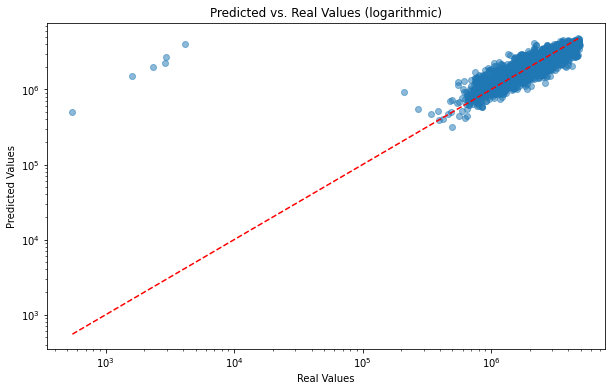

In [35]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Real Values (logarithmic)")


plt.xscale("log")
plt.yscale("log")


min_value = min(min(y_test), min(y_pred_test))
max_value = max(max(y_test), max(y_pred_test))
plt.plot([min_value, max_value], [min_value, max_value], color="red", linestyle="--")

plt.show()

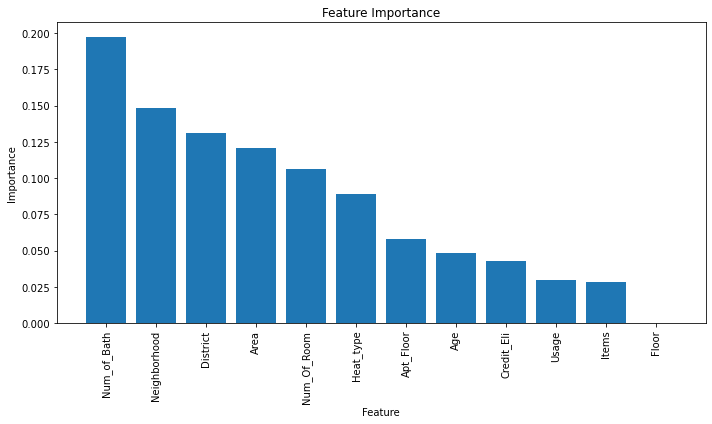

In [37]:

# Get feature importance scores
importance_scores = best_model.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
# Create a bar plot of the feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [38]:
value_counts = df['District'].value_counts()
district_counts = {}

for value, count in value_counts.items():
    district_counts[value] = count

In [39]:
Xdist = df_filtered.drop(columns=["District"], axis=1).iloc[:, :-1].values
Ydist = df_filtered.drop(columns=["District"], axis=1)["Price"].values

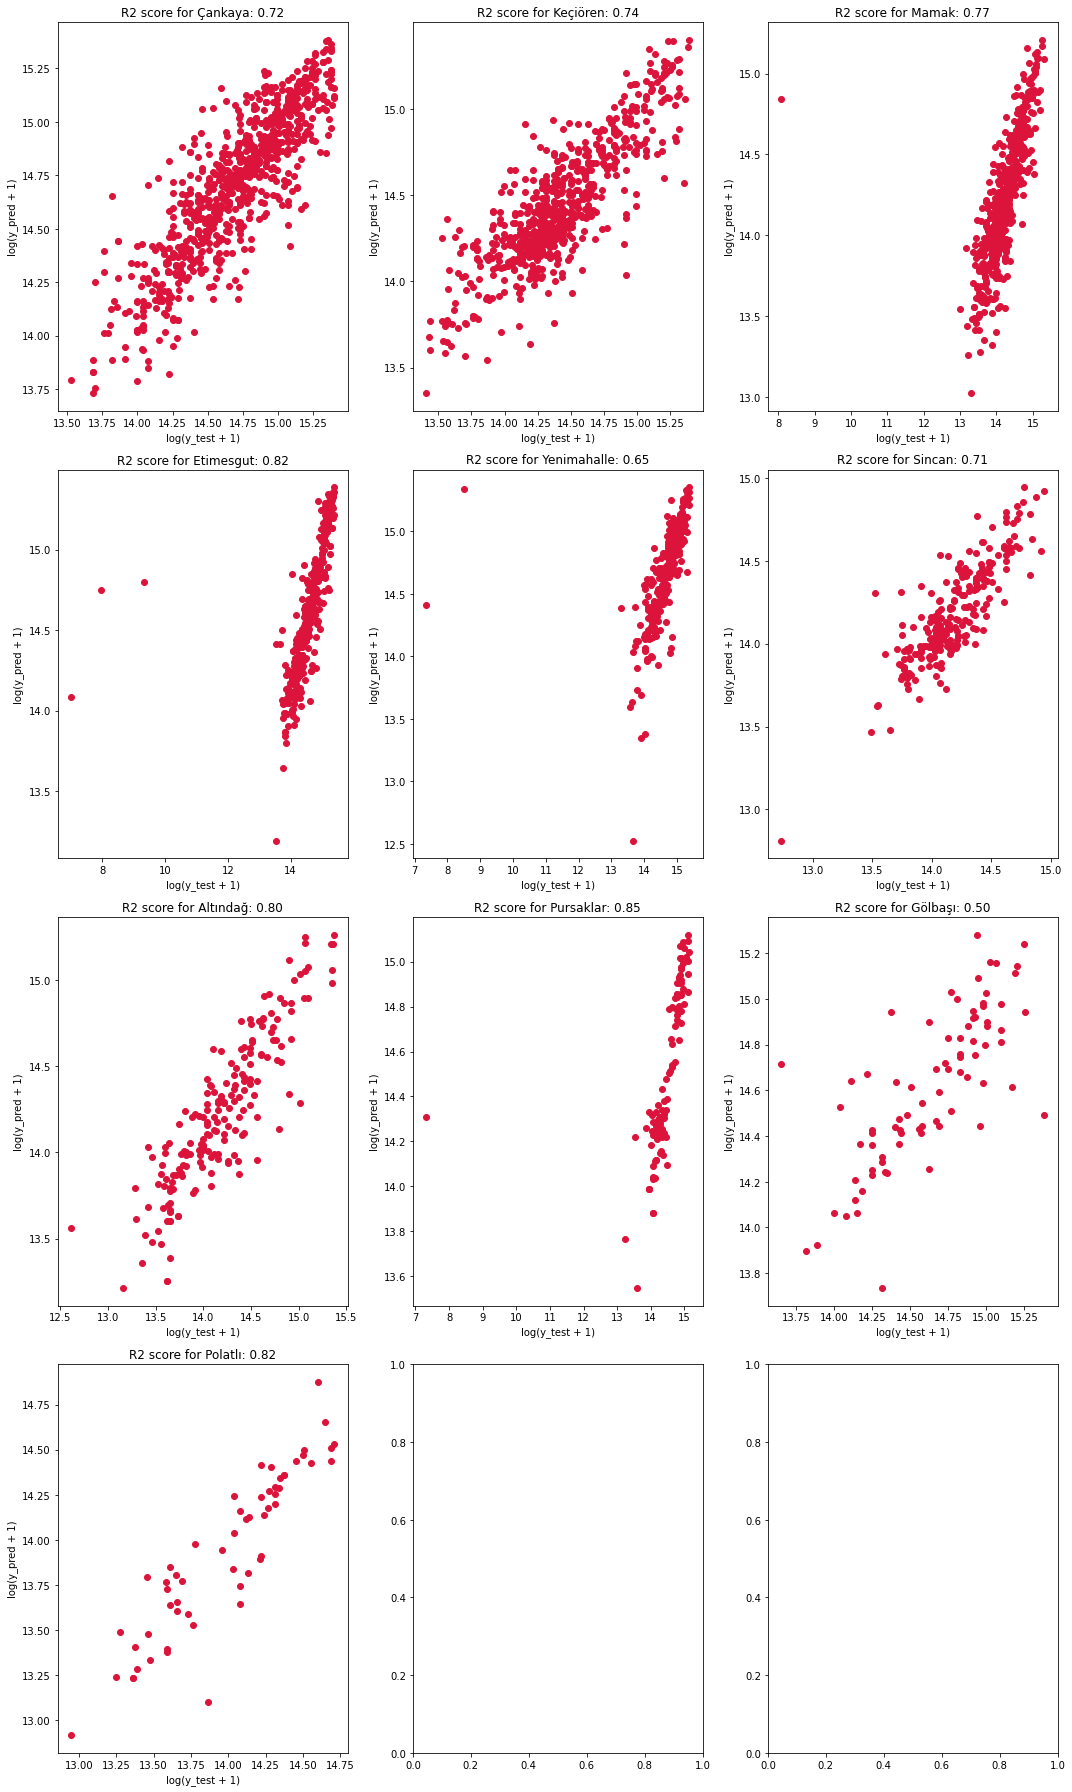

In [40]:

categorical_columns_dist = ['Neighborhood',"Usage","Heat_type","Floor"]
fig, axs = plt.subplots(4, 3, figsize=(15, 25))
axs = axs.flatten()

plot_index = 0

for i in district_counts:
    df_d = df_filtered[df_filtered["District"] == i]
    if district_counts[i] > 200:
        
    
    
        
        Xdist = df_d.drop(columns=["District"], axis=1).iloc[:, :-1]
        Ydist = df_d.drop(columns=["District"], axis=1)["Price"].values

        encoder_dist = ce.TargetEncoder(cols=categorical_columns_dist)
        X_encodedd = encoder_dist.fit_transform(Xdist, Ydist)
        
        X_traind, X_testd, y_traind, y_testd = train_test_split(X_encodedd.values, Ydist ,test_size=0.2, random_state=42)

        best_params = {'colsample_bytree': 0.5,  'gamma': 0.1, 'learning_rate': 0.01,
               'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 4000, 'reg_alpha': 0.5, 'reg_lambda': 2,
               'subsample': 0.5}

        best_model = xg.XGBRegressor(**best_params)
        
        best_model.fit(X_traind,y_traind)

        y_pred_train_lr = best_model.predict(X_traind)
        y_pred_test_lr = best_model.predict(X_testd)
        mse_test_lr = MSE(y_testd, y_pred_test_lr)
        r2 = r2_score(y_testd, y_pred_test_lr)

        y_test_log = np.log1p(y_testd)
        y_pred_log = np.log1p(y_pred_test_lr)

        axs[plot_index].scatter(y_test_log, y_pred_log, c='crimson')
        axs[plot_index].set_xlabel('log(y_test + 1)')
        axs[plot_index].set_ylabel('log(y_pred + 1)')

        if 0 < r2 < 1:
            axs[plot_index].set_title(f"R2 score for {i}: {r2:.2f}")
        else:
            axs[plot_index].set_title(f"poor performance by {i}: {r2:.2f}")

        plot_index += 1

plt.tight_layout()
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
msle = mean_squared_log_error(y_test,y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)


In [44]:

# Define the performance data
performance_data = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
               'Mean Squared Log Error (MSLE)', 'Mean Absolute Percentage Error (MAPE)', 'R-squared'],
    'Value': [mae, mse, rmse, msle, mape, r2]
}

# Create a DataFrame from the performance data
performance_df = pd.DataFrame(performance_data)

# Print the performance DataFrame
print(performance_df)

                                  Metric         Value
0              Mean Absolute Error (MAE)  2.962721e+05
1               Mean Squared Error (MSE)  1.764752e+11
2         Root Mean Squared Error (RMSE)  4.200895e+05
3          Mean Squared Log Error (MSLE)  1.192742e-01
4  Mean Absolute Percentage Error (MAPE)  1.706053e+00
5                              R-squared  8.002250e-01
